In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Loading and Inspecting the Data

We will be working with a dataset of audiobooks downloaded from audible.in from 1998 to 2025 (pre-planned releases). [Source](https://www.kaggle.com/datasets/snehangsude/audible-dataset)

The first thing we will do is load the raw audible data.

### Instructions:
* Using pandas, read the `audible_raw.csv` file that is located inside the `data` folder in our local directory. Assign to `audible`.
* Show the first few rows of the `audible` data frame.

In [2]:
# Load the audible_raw.csv file
df = pd.read_csv('audible_raw.csv')
# View the first rows of the dataframe
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


### 💾 The data

- "name" - The name of the audiobook.
- "author" - The audiobook's author.
- "narrator" - The audiobook's narrator.
- "time" -  The audiobook's duration, in hours and minutes.
- "releasedate" -  The date the audiobook was published.
- "language" -  The audiobook's language.
- "stars" -  The average number of stars (out of 5) and the number of ratings (if available).
- "price" -  The audiobook's price in INR (Indian Rupee).

 We can use the `.info()` method to inspect the data types of the columns

In [3]:
# Inspect the columns' data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


## Task 2: Clean text data in Author and Narrator columns

We will start cleaning some of the text columns like `author` and `narrator`. We can remove the `Writtenby:` and `Narratedby:` portions of the text in those columns.

For this, we will use the `.str.replace()` method

### Instructions:
* Remove 'Writtenby:' from the `author` column
* Remove 'Narratedby:' from the `narrator` column
* Check the results

In [4]:
# Remove Writtenby: from the author column
df['author'] = df['author'].str.replace('Writtenby:','')
# Remove Narratedby: from the narrator column
df['narrator'] = df['narrator'].str.replace('Narratedby:','')
# Check the results
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


## Task 3: Extract number of stars and ratings from Stars column.

The `stars` column combines the number of stars and the number of ratins. Let's turn this into numbers and split it into two columns: `rating_stars` and `n_ratings`.

First we will use the `.sample()` method to get a glimpse at the type of entries in that column.

In [5]:
# Get a glimpse of the stars column
df['stars'].sample(n=10)

25716    4 out of 5 stars15 ratings
68706                 Not rated yet
82570                 Not rated yet
68408                 Not rated yet
29221                 Not rated yet
6788                  Not rated yet
3152       5 out of 5 stars1 rating
56146                 Not rated yet
83316                 Not rated yet
30964                 Not rated yet
Name: stars, dtype: object

Since there are many instances of `Not rated yet`, let's filter them out and sample again:

In [6]:
# Explore the values of the star column that are not 'Not rated yet'
df[df['stars'] != 'Not rated yet'].stars.sample(n=10)

54955      5 out of 5 stars4 ratings
27329      5 out of 5 stars6 ratings
4501        5 out of 5 stars1 rating
19455      5 out of 5 stars8 ratings
71553       4 out of 5 stars1 rating
18335     4 out of 5 stars20 ratings
59657       3 out of 5 stars1 rating
84765      5 out of 5 stars4 ratings
43751       2 out of 5 stars1 rating
5445     4.5 out of 5 stars2 ratings
Name: stars, dtype: object

As a first step, we can replace the instances of `Not rated yet` with `NaN`

In [7]:
# Replace 'Not rated yet' with NaN
df['stars'] = df['stars'].str.replace('Not rated yet', 'NaN')

We can use `.str.extract()` to get the number of stars and the number of ratings into their own columns.

### Instructions:
* Extract the number of stars into the `rating_stars` column
* Extract the number of ratings into the `n_ratings` column
* Convert both new columns to float

In [8]:
# Extract number of stars into rating_stars and turn into float
df['rating_stars'] = df['stars'].str.extract('^([\d.]+)').astype('float')
# Replace the comma, extract number of ratings into n_ratings and turn into float
df['n_ratings'] = df['stars'].str.extract('(\d+(?:,\d+)?) rating')[0].str.replace(',', '').astype('float', errors='ignore')
# Examine the new rating_stars and n_ratings columns
df[['rating_stars', 'n_ratings']]

,rating_stars,n_ratings
0,5.0,34.0
1,4.5,41.0
2,4.5,38.0
3,4.5,12.0
4,4.5,181.0
...,...,...
87484,NaN,NaN
87485,NaN,NaN
87486,NaN,NaN
87487,NaN,NaN


As a last step, let's delete the `stars` column using the `.drop` command:

In [9]:
# Drop the stars column
df = df.drop(columns=['stars'], axis=1)
# Check the results
df.head()

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,04-08-08,English,468.00,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,01-05-18,English,820.00,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,06-11-20,English,410.00,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,05-10-21,English,615.00,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,13-01-10,English,820.00,4.5,181.0


## Task 4: Change data types

Another important step is to have our data in the correct data types

### Instructions:
* Set `price` to float
* Turn `rating_stars` to category
* Convert `releasedate` to datetime

We need to get rid of the comma and the word 'Free' before we can convert the data.

In [11]:
# Replace the comma with ''
df['price'] = df['price'].str.replace(',', '')
# Replace 'Free' with 0
df['price'] = df['price'].str.replace('Free', '0')
# Turn price to float
df['price'] = df['price'].astype('float')

* Turn `rating_stars` to category

Since `stars` can only take a small number of discrete values, the best data type for the column is `category`.

Let's first look at the unique values in that column to confirm:

In [12]:
# Look at the unique values in the rating_stars column
df['rating_stars'].nunique()

9

We can now use `.astype` to change the data type.

In [13]:
# Turn rating_stars to category
df['rating_stars'] = df['rating_stars'].astype('category')

* Convert `releasedate` date to datetime

Here we will use the `to_datetime()` function to turn the dates into datetime objects:

In [14]:
# Convert releasedate to datetime
df['releasedate'] = pd.to_datetime(df['releasedate'])
# Inspect the dataframe 
df.head()

/var/folders/rk/vsbmyjqx09n87m8t22syxyvr0000gn/T/ipykernel_10867/1015981186.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['releasedate'] = pd.to_datetime(df['releasedate'])


,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-04-08,English,468.0,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,820.0,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-06-11,English,410.0,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,615.0,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,820.0,4.5,181.0


## Task 5: Extract hours and minutes from the `time` column

The `time` column combines the number of hours and minutes into one column. We want to transform and consolidate the information into a new `time_minutes` column.

In [15]:
df.head()

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hrs and 20 mins,2008-04-08,English,468.0,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,820.0,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hrs and 3 mins,2020-06-11,English,410.0,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,615.0,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hrs,2010-01-13,English,820.0,4.5,181.0


In [16]:
# Explore the values in the time column
df['time'].value_counts().sample(n=10)

time
58 hrs and 17 mins     1
81 hrs and 2 mins      1
26 hrs and 33 mins     3
4 hrs and 14 mins     83
34 hrs and 10 mins     1
32 hrs and 48 mins     2
18 hrs and 23 mins     5
16 hrs and 42 mins    16
35 hrs and 29 mins     1
2 hrs and 1 min       70
Name: count, dtype: int64

Let's see what other ways they have encoded `min` or `minutes`:

In [17]:
# Search the entries in the time column for different spellings of min. Let' try min, mins, minutes
df['time'].str.contains('minutes')

0        False
1        False
2        False
3        False
4        False
         ...  
87484    False
87485    False
87486    False
87487    False
87488    False
Name: time, Length: 87489, dtype: bool

We can see that we need to fix the following:
* hr, hrs -> consolidate as `hr`
* min, mins -> consolidate as `min`
* Less than 1 minute -> round to 1 min

In [18]:
# Replace hrs, mins, and 'Less than 1 minute'
df['time'] = df['time'].str.replace('hrs', 'hr')
df['time'] = df['time'].str.replace('mins', 'min')
df['time'] = df['time'].str.replace('Less than 1 minute', '1 min')

Let's see how it looks now:

In [19]:
# Check the results
df.head()

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hr and 20 min,2008-04-08,English,468.0,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hr and 8 min,2018-01-05,English,820.0,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,2 hr and 3 min,2020-06-11,English,410.0,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hr and 16 min,2021-05-10,English,615.0,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hr,2010-01-13,English,820.0,4.5,181.0


The next step is to extract the number of hours and minutes from the text, then combine in a new `time_mins` column.

### Instructions: 
* Extract the number of hours from `time`. Assign to the `hours` variable.
* Extract the number of minutes from `time`. Assign to the `mins` variable.
* Create the `time_mins` column combining hours and minutes.

In [20]:
# Extract the number of hours, turn to integer
hours = df['time'].str.extract('(\d+) hr').fillna(0).astype('int')
# Extract the number of minutes, turn to integer
minutes = df['time'].str.extract('(\d+) min').fillna(0).astype('int')
# Combine hours and minutes into the time_mins column
df['time_mins'] = hours * 60 + minutes
# Check the results
df.head()

,name,author,narrator,time,releasedate,language,price,rating_stars,n_ratings,time_mins
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2 hr and 20 min,2008-04-08,English,468.0,5.0,34.0,140
1,The Burning Maze,RickRiordan,RobbieDaymond,13 hr and 8 min,2018-01-05,English,820.0,4.5,41.0,788
2,The Deep End,JeffKinney,DanRussell,2 hr and 3 min,2020-06-11,English,410.0,4.5,38.0,123
3,Daughter of the Deep,RickRiordan,SoneelaNankani,11 hr and 16 min,2021-05-10,English,615.0,4.5,12.0,676
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,10 hr,2010-01-13,English,820.0,4.5,181.0,600


And as final step, let's delete the columns we don't need any more:

In [21]:
# Drop the time column
df = df.drop(columns=['time'],axis=1)

Here is how our dataframe looks now:

In [22]:
# Inspect the dataframe 
df.head()

,name,author,narrator,releasedate,language,price,rating_stars,n_ratings,time_mins
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,2008-04-08,English,468.0,5.0,34.0,140
1,The Burning Maze,RickRiordan,RobbieDaymond,2018-01-05,English,820.0,4.5,41.0,788
2,The Deep End,JeffKinney,DanRussell,2020-06-11,English,410.0,4.5,38.0,123
3,Daughter of the Deep,RickRiordan,SoneelaNankani,2021-05-10,English,615.0,4.5,12.0,676
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,2010-01-13,English,820.0,4.5,181.0,600


## Task 6: Check data ranges

Another important step is to confirm that the values in our columns are in the expected ranges and that we don't have out-of-range values.

Let's create a histogram of the numeric columns to visually inspect ht ranges and the shape of the distribution:

<Figure size 1600x1600 with 0 Axes>

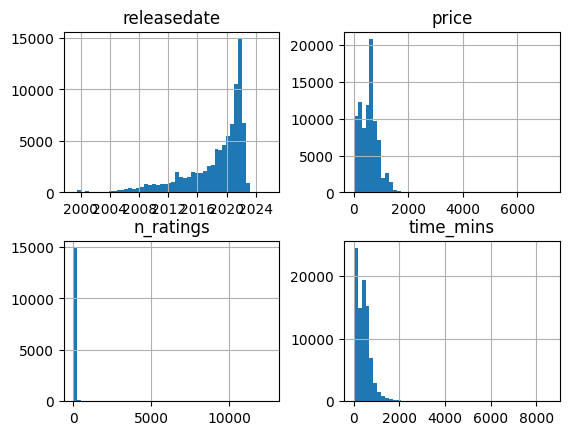

In [25]:
# Plot histograms of all the numerical columns
#num_cols = df.select_dtypes(include='float')
plt.figure(figsize=(16, 16))
df.hist(bins=50)
plt.show()

Additionally, we can use `.describe()` to look at a summary of our data

In [26]:
# Look at the numeric columns
df.describe()

,releasedate,price,n_ratings,time_mins
count,87489,87489.000000,15072.000000,87489.000000
mean,2018-06-22 01:35:29.780886528,559.009246,21.613190,417.497663
min,1998-12-27 00:00:00,0.000000,1.000000,1.000000
25%,2016-08-30 00:00:00,268.000000,1.000000,142.000000
50%,2020-01-30 00:00:00,585.000000,2.000000,386.000000
75%,2021-08-04 00:00:00,755.000000,7.000000,584.000000
max,2025-11-14 00:00:00,7198.000000,12573.000000,8595.000000
std,NaN,336.096642,207.479634,364.559399


In [27]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,name,author,narrator,releasedate,language,rating_stars
count,87489,87489,87489,87489,87489,15072.0
unique,82767,48374,29717,NaN,36,9.0
top,The Art of War,"矢島雅弘,石橋遊",anonymous,NaN,English,5.0
freq,20,874,1034,NaN,61884,6761.0
mean,NaN,NaN,NaN,2018-06-22 01:35:29.780886528,NaN,NaN
min,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN
25%,NaN,NaN,NaN,2016-08-30 00:00:00,NaN,NaN
50%,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN
75%,NaN,NaN,NaN,2021-08-04 00:00:00,NaN,NaN
max,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN


We will transform the prices in `price` to USD for this exercise. We can use the exchange rate of 1 USD = 0.012 INR:

In [28]:
# Transform prices to USD (multiply times 0.012)
df['price'] = df['price'] * 0.012
# Check the results
df.price.describe()

count    87489.000000
mean         6.708111
std          4.033160
min          0.000000
25%          3.216000
50%          7.020000
75%          9.060000
max         86.376000
Name: price, dtype: float64

There values in the `language` column have different capitalization. Let's fix that.

In [29]:
# Inspect the language column before making changes
df['language'].value_counts()

language
English             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
Hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
korean                  4
slovene                 4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: count, dtype: int64

In [30]:
# Update capitalization in the language column
df['language'] = df['language'].str.capitalize()
# Check the results
df.language.value_counts()

language
English             61884
German               8295
Spanish              3496
Japanese             3167
Italian              2694
French               2386
Russian              1804
Danish                935
Portuguese            526
Swedish               515
Hindi                 436
Polish                224
Finnish               197
Dutch                 190
Tamil                 161
Catalan               153
Mandarin_chinese       97
Icelandic              52
Romanian               50
Hungarian              36
Urdu                   34
Afrikaans              28
Czech                  23
Turkish                20
Greek                  18
Arabic                 16
Norwegian              16
Galician               10
Bulgarian               9
Korean                  4
Slovene                 4
Hebrew                  2
Basque                  2
Telugu                  2
Lithuanian              2
Ukrainian               1
Name: count, dtype: int64

## Task 7: Checking for duplicates

How many duplicates do we have?

As a first step look for duplicates using `.duplicated()` and `.sum()`:

In [31]:
# Look for duplicate rows
df.duplicated().sum()

0

It is useful to look for duplicates only using a subset of the columns that make sense. We will use the following subset of columns:
* name
* author
* narrator
* time_mins
* price

Here we use `.duplicated()` again, but with our subset of columns.

In [32]:
# Create a list of our subset columns and assign to subset_cols
subset_cols = df[['name','author','narrator','time_mins','price']]
# Check for duplicates using our subset of columns
subset_cols.duplicated().sum()

70

Let's look at those values (use `keep=false`) and see what is going on:

In [33]:
# Check the duplicated rows keeping the duplicates and order by the name column
duplicated_rows = subset_cols[subset_cols.duplicated(keep=False)]
sorted_duplicated_rows = duplicated_rows.sort_values(by='name')
sorted_duplicated_rows

,name,author,narrator,time_mins,price
63978,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,144,2.796
63965,"""Das Böse ist des Menschen beste Kraft""",ChristianLiederer,ThomasKrause,144,2.796
24625,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,495,7.032
24116,90 Minutes in Heaven,"DonPiper,CecilMurphey",DonPiper,495,7.032
16971,Adagio in Dm,BillBrown,BillBrown,78,5.472
...,...,...,...,...,...
18338,What I Talk About When I Talk About Running,HarukiMurakami,RayPorter,263,4.776
38021,When Women Ruled the World,KaraCooney,KaraCooney,555,10.032
20260,When Women Ruled the World,KaraCooney,KaraCooney,555,10.032
22158,Wings of Fire,"APJAbdulKalam,ArunTiwari",GirishKarnad,75,0.900


We can see that the duplicates are for files with different release dates. We can decide to keep the record with the last release date.

We will can use the `drop_duplicates()` method with the same subset and using `keep=last` to keep the last release date

In [34]:
# Drop duplicated rows keeping the last release date
df = df.drop_duplicates(subset=subset_cols, keep='last')

We can check again for duplicates:

In [35]:
# Check again for duplicates using our subset of columns
df.duplicated().sum()

0

## Task 8: Dealing with missing data

Before we finish, let's take a look at missing data in our columns. We can use the `.isna()` method and chain it with `.sum()` to get the total:

In [36]:
# Check for null values
df.isna().sum()

name                0
author              0
narrator            0
releasedate         0
language            0
price               0
rating_stars    72387
n_ratings       72387
time_mins           0
dtype: int64

We could turn the **NaN** values to 0 or another numeric value, or we could keep them. It depends on our use case.

If we want to plot the ratings distribution, it can make sense to drop audiobooks with no ratings. But if we need to use the distribution of prices for our analysis, then removing audiobooks with no ratings will bias our results (since unrated audiobooks are likely more niche and might have a different pricing structure than rated audiobooks).

We will keep the unrated audiobooks for now.

## Task 9: Save the cleaned data set

We can use the `.to_csv` method to save the clean file. We include `index=False` so that we don't also copy the current index to our destination file.

In [98]:
# Save the dataframe to a new file: 'audible_clean.csv'
df.to_csv('audible_clean.csv', index=False)